In [2]:
from tor.base import DBManager
from matplotlib import pyplot as plt
from datetime import date
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
import matplotlib.colors as colors

In [3]:
boxNames = []
results = DBManager.executeQuery("SELECT Position,  Material FROM Client WHERE Position >=1 AND Position <= 27 ORDER BY Position")
for r in results:
    boxNames.append(str(r.Position) + " " + r.Material)
boxNames

['1 Orangenscheiben',
 '2 Kork',
 '3 Polstermoos',
 '4 Palmenblatt',
 '5 Pfeffer',
 '6 Acacia Bohnen',
 '7 Luffa',
 '8 Platanen',
 '9 Pampasgras',
 '10 Strandflieder',
 '11 Japanischer Schlitzahorn',
 '12 Palmringe',
 '13 Baumwolle',
 '14 Air-Fern',
 '15 Samtgras',
 '16 Wachtelbohne',
 '17 Essigbaum',
 '18 Chilis',
 '19 Gerstenähren',
 '20 Zimtstangen',
 '21 Kaffeebohnen',
 '22 Baumschwamm',
 '23 Linsen',
 '24 Apfelscheiben',
 '25 Eucalyptus',
 '26 Lavendel',
 '27 Sternanis']

In [16]:
#results = DBManager.getResultsByEvent("Kapelica2022")
datestr = "2022-06-01"
dateend = "2022-06-10"
#results = DBManager.executeQuery("SELECT c.Position, c.Latin, Result, UserGenerated, X, Y, Time AS Time FROM diceresult d LEFT JOIN client c ON c.Id = d.ClientId WHERE DATE(Time) = \"" + datestr + "\" AND c.Position >=1 AND c.Position <= 27 ORDER BY d.Id DESC")
results = DBManager.executeQuery("SELECT c.Position, c.Latin, Result, UserGenerated, X, Y, Time AS Time FROM diceresult d LEFT JOIN client c ON c.Id = d.ClientId WHERE DATE(Time) > \"" + datestr + "\" AND DATE(Time) < \"" + dateend + "\" AND c.Position >=1 AND c.Position <= 27 ORDER BY d.Id DESC")
#results = DBManager.executeQuery("SELECT c.Position, c.Latin, Result, UserGenerated, X, Y, Time AS Time FROM diceresult d LEFT JOIN client c ON c.Id = d.ClientId WHERE c.Position >=1 AND c.Position <= 27 AND DATE(TIME) >= \"2022-06-07\" ORDER BY d.Id DESC")
results

times = []
boxes = []
xs = []
ys = []
i = 0
for i in range(len(boxNames)):
    xs.append([])
    ys.append([])
for r in results:
    i += 1
    #times.append(datetime.combine(r.Time.date(), datetime.min.time()).timestamp())
    times.append(r.Time.timestamp())
    boxes.append(r.Position)
    xs[r.Position-1].append(r.X)
    ys[r.Position-1].append(r.Y)
    if i < -1:
        break;
times, boxes
print(len(times))

11214


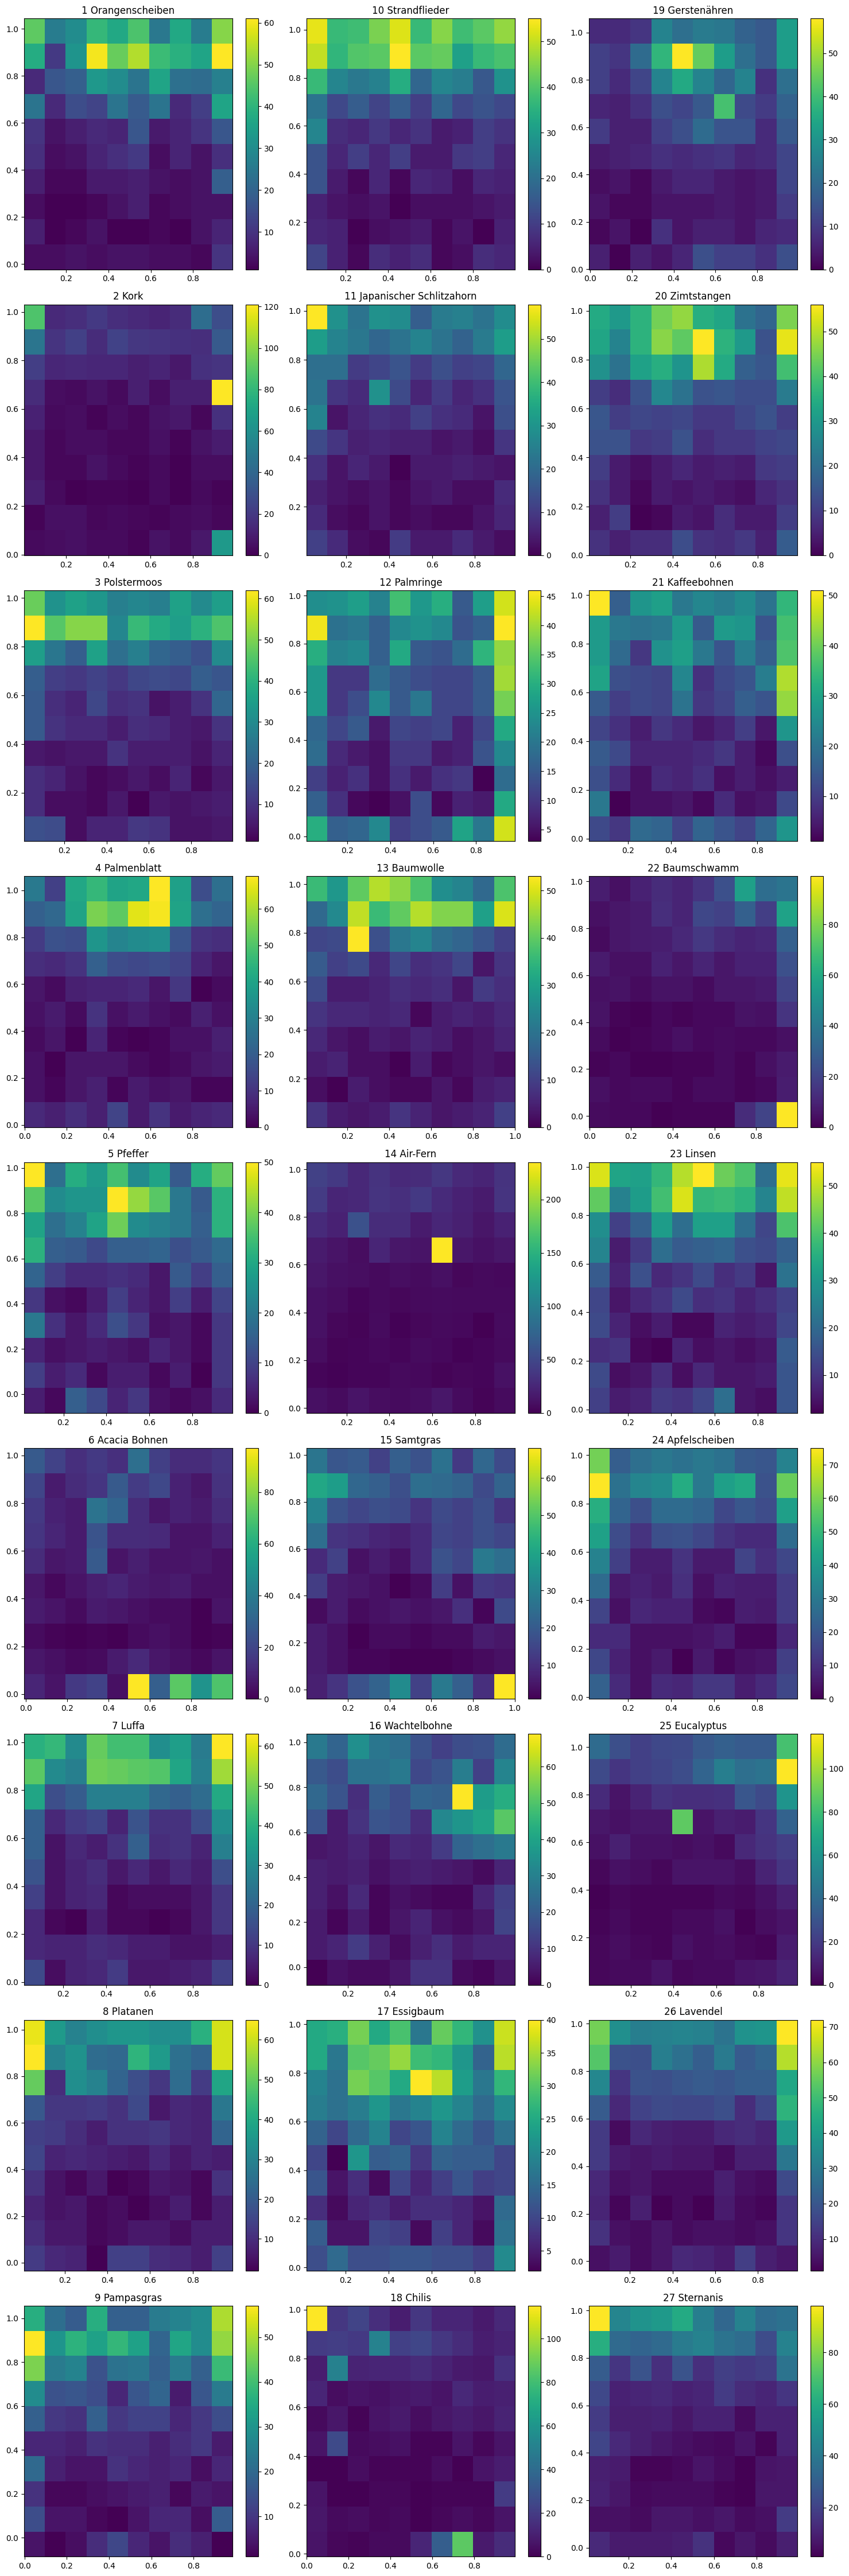

In [5]:
fig, axs = plt.subplots(9, 3, tight_layout=True, figsize=(15, 45))
for i in range(9):
    for j in range(3):
        ax = axs[i, j]
        pos = i + j*9
        cordHisto = ax.hist2d(xs[pos], ys[pos], bins=(10, 10))
        axs[i, j].set_title(boxNames[pos])
        fig.colorbar(cordHisto[3], ax=axs[i,j])

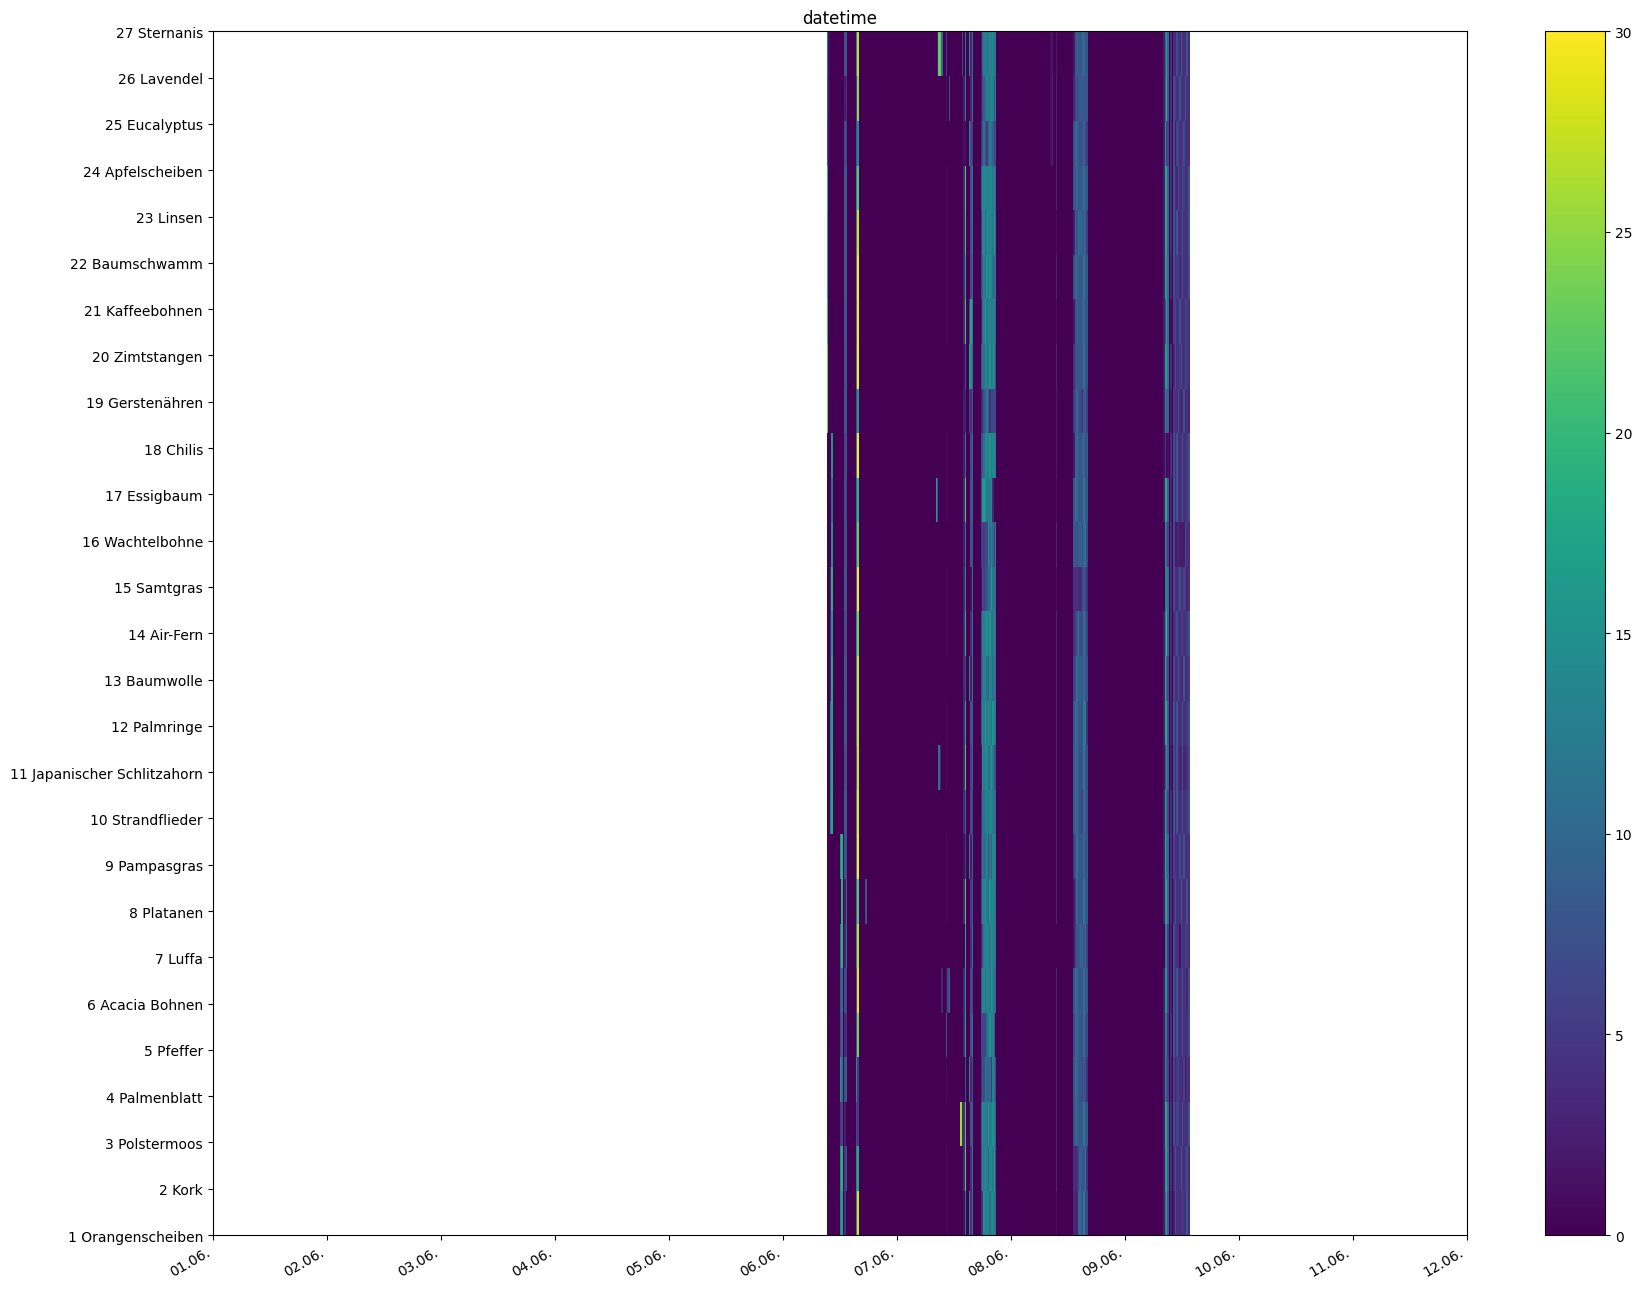

In [19]:
bins = [250, 27]
# compute the 2D histogram using numpy
H,xedges,yedges = np.histogram2d(times, boxes, bins=bins)
# convert the x-edges into datetime format
to_datetime = np.vectorize(datetime.fromtimestamp)
xedges_datetime = to_datetime(xedges)

# plot the two cases side by side
fig, ax = plt.subplots(1, 1, figsize=(18,13))

histo = ax.pcolor(xedges_datetime, yedges, H.T, cmap='viridis')
ax.set_title('datetime')
ax.set_xlim([datetime(2022, 6, 1), datetime(2022, 6, 12)])
fig.colorbar(histo, ax=ax)
# pretty up the xaxis labels
#loc = mdates.MinuteLocator(byminute=(0, 30))
loc = mdates.DayLocator()
#fmt = mdates.DateFormatter('%d.%m. - %H:%M:%S')
fmt = mdates.DateFormatter('%d.%m.')

ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(fmt)

ax.set_yticks(np.arange(1,28,1))
ax.set_yticklabels(boxNames)

fig.autofmt_xdate()
fig.tight_layout()